<a href="https://colab.research.google.com/github/hansleolml/Pokemon_RandomForest/blob/master/Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sn
from google.colab import files
from google.colab import drive

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
nuestroPokemon = pd.read_csv("drive/My Drive/Colab Notebooks/Datasets/pokedex.csv")

In [4]:
nuestroPokemon.columns

Index(['NUMERO', 'NOMRE', 'TIPO_1', 'TIPO_2', 'PUNTOS_DE_VIDA',
       'PUNTOS_ATAQUE', 'PUNTOS_DEFENSA', 'PUNTOS_ATAQUE_ESPECIAL',
       'PUNTO_DEFENSA_ESPECIAL', 'PUNTOS_VELOCIDAD', 'NOMBRE_GENERATIONS',
       'LEGENDARIO'],
      dtype='object')

**EDITAMOS EL NOMBRE DE LA COLUMNA DE "NOMRE" A "NOMBRE"**

In [5]:
nuestroPokemon=nuestroPokemon.rename(columns={'NOMRE':'NOMBRE'})
nuestroPokemon.columns

Index(['NUMERO', 'NOMBRE', 'TIPO_1', 'TIPO_2', 'PUNTOS_DE_VIDA',
       'PUNTOS_ATAQUE', 'PUNTOS_DEFENSA', 'PUNTOS_ATAQUE_ESPECIAL',
       'PUNTO_DEFENSA_ESPECIAL', 'PUNTOS_VELOCIDAD', 'NOMBRE_GENERATIONS',
       'LEGENDARIO'],
      dtype='object')

In [6]:
nuestroPokemon.tail()

,NUMERO,NOMBRE,TIPO_1,TIPO_2,PUNTOS_DE_VIDA,PUNTOS_ATAQUE,PUNTOS_DEFENSA,PUNTOS_ATAQUE_ESPECIAL,PUNTO_DEFENSA_ESPECIAL,PUNTOS_VELOCIDAD,NOMBRE_GENERATIONS,LEGENDARIO
795,796,Diancie,Roca,Hada,50,100,150,100,150,50,6,VERDADERO
796,797,Mega Diancie,Roca,Hada,50,160,110,160,110,110,6,VERDADERO
797,798,Hoopa contenido,Psiquico,Fantasma,80,110,60,150,130,70,6,VERDADERO
798,799,Hoopa desatado,Psiquico,Siniestro,80,160,60,170,130,80,6,VERDADERO
799,800,Volcanion,Fuego,Agua,80,110,120,130,90,70,6,VERDADERO


LA COLUMNA "TIPO_2" SOLO CUENTA CON 413 VALORES , PERO ESO ES PORQUE ALGUNOS POKEMONES NO TIENEN "TIPO_2", ASI QUE NO HAY NINGUN PROBLEMA

In [7]:
nuestroPokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NUMERO                  800 non-null    int64 
 1   NOMBRE                  800 non-null    object
 2   TIPO_1                  800 non-null    object
 3   TIPO_2                  413 non-null    object
 4   PUNTOS_DE_VIDA          800 non-null    int64 
 5   PUNTOS_ATAQUE           800 non-null    int64 
 6   PUNTOS_DEFENSA          800 non-null    int64 
 7   PUNTOS_ATAQUE_ESPECIAL  800 non-null    int64 
 8   PUNTO_DEFENSA_ESPECIAL  800 non-null    int64 
 9   PUNTOS_VELOCIDAD        800 non-null    int64 
 10  NOMBRE_GENERATIONS      800 non-null    int64 
 11  LEGENDARIO              800 non-null    object
dtypes: int64(8), object(4)
memory usage: 75.1+ KB


**Tranformación de la columna LEGENDARIO en entero 0 = false & 1 = true**

In [8]:
nuestroPokemon['LEGENDARIO']=nuestroPokemon['LEGENDARIO'].replace("FALSO",0)
nuestroPokemon['LEGENDARIO']=nuestroPokemon['LEGENDARIO'].replace("VERDADERO",1)
nuestroPokemon.head()

,NUMERO,NOMBRE,TIPO_1,TIPO_2,PUNTOS_DE_VIDA,PUNTOS_ATAQUE,PUNTOS_DEFENSA,PUNTOS_ATAQUE_ESPECIAL,PUNTO_DEFENSA_ESPECIAL,PUNTOS_VELOCIDAD,NOMBRE_GENERATIONS,LEGENDARIO
0,1,Bulbasaur,Planta,Veneno,45,49,49,65,65,45,1,0
1,2,Ivysaur,Planta,Veneno,60,62,63,80,80,60,1,0
2,3,Venusaur,Planta,Veneno,80,82,83,100,100,80,1,0
3,4,Mega Venusaur,Planta,Veneno,80,100,123,122,120,80,1,0
4,5,Charmander,Fuego,NaN,39,52,43,60,50,65,1,0


#Cargar los archivos de combate

In [0]:
combates = pd.read_csv("drive/My Drive/Colab Notebooks/Datasets/combates.csv")

In [10]:
combates.head()

,Primer_Pokemon,Segundo_Pokemon,Pokemon_Ganador
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [11]:
combates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Primer_Pokemon   50000 non-null  int64
 1   Segundo_Pokemon  50000 non-null  int64
 2   Pokemon_Ganador  50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


In [12]:
num1eraPos = combates.groupby('Primer_Pokemon').count()
num1eraPos = num1eraPos.drop(columns="Pokemon_Ganador")
num1eraPos=num1eraPos.rename(columns={'Segundo_Pokemon':'Cantidad_Combates'})
num1eraPos.head()

,Cantidad_Combates
Primer_Pokemon,
1,70
2,55
3,68
4,62
5,50


In [13]:
num1eraPos.shape

(784, 1)

In [14]:
num2daPos =combates.groupby('Segundo_Pokemon').count()
num2daPos = num2daPos.drop(columns="Pokemon_Ganador")
num2daPos=num2daPos.rename(columns={'Primer_Pokemon':'Cantidad_Combates'})
num2daPos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 1 to 800
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Cantidad_Combates  784 non-null    int64
dtypes: int64(1)
memory usage: 12.2 KB


In [15]:
num2daPos.shape

(784, 1)

In [16]:
#Calculamos el número de combates de cada Pokemon
numCombates = num1eraPos + num2daPos
numCombates.head()

,Cantidad_Combates
Primer_Pokemon,
1,133
2,121
3,132
4,125
5,112


In [17]:
combates.head()

,Primer_Pokemon,Segundo_Pokemon,Pokemon_Ganador
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [0]:
#Calculamos el número de combates Ganados de cada Pokemon
numGanador = combates.groupby('Pokemon_Ganador').count()
numGanador = numGanador.drop(columns="Segundo_Pokemon")
numGanador=numGanador.rename(columns={'Primer_Pokemon':'Combates_Ganados'})

In [19]:
numGanador.index.names = ['NUMERO']
numGanador.head()

,Combates_Ganados
NUMERO,
1,37
2,46
3,89
4,70
5,55


In [20]:
numCombates.index.names = ['NUMERO']
numCombates.head()

,Cantidad_Combates
NUMERO,
1,133
2,121
3,132
4,125
5,112


In [21]:
newPokedex = pd.merge(numCombates,numGanador, how='outer',on='NUMERO')
newPokedex['Porcentaje_Victorias'] = (newPokedex['Combates_Ganados'] / newPokedex['Cantidad_Combates']) * 100
newPokedex.head()

,Cantidad_Combates,Combates_Ganados,Porcentaje_Victorias
NUMERO,,,
1,133,37.0,27.819549
2,121,46.0,38.016529
3,132,89.0,67.424242
4,125,70.0,56.000000
5,112,55.0,49.107143


In [0]:
#Convertimos el index a columna
newPokedex = newPokedex.reset_index()

In [23]:
newPokedex.head()

,NUMERO,Cantidad_Combates,Combates_Ganados,Porcentaje_Victorias
0,1,133,37.0,27.819549
1,2,121,46.0,38.016529
2,3,132,89.0,67.424242
3,4,125,70.0,56.000000
4,5,112,55.0,49.107143


In [24]:
#Recordamos la estructura del dataframe nuestroPokemon
nuestroPokemon.head()

,NUMERO,NOMBRE,TIPO_1,TIPO_2,PUNTOS_DE_VIDA,PUNTOS_ATAQUE,PUNTOS_DEFENSA,PUNTOS_ATAQUE_ESPECIAL,PUNTO_DEFENSA_ESPECIAL,PUNTOS_VELOCIDAD,NOMBRE_GENERATIONS,LEGENDARIO
0,1,Bulbasaur,Planta,Veneno,45,49,49,65,65,45,1,0
1,2,Ivysaur,Planta,Veneno,60,62,63,80,80,60,1,0
2,3,Venusaur,Planta,Veneno,80,82,83,100,100,80,1,0
3,4,Mega Venusaur,Planta,Veneno,80,100,123,122,120,80,1,0
4,5,Charmander,Fuego,NaN,39,52,43,60,50,65,1,0


###Juntamos los dataframes nuestroPokemon y newPokedex

In [25]:
pokedexUltimate = pd.merge(nuestroPokemon,newPokedex, how='inner', on='NUMERO')
pokedexUltimate.tail()

,NUMERO,NOMBRE,TIPO_1,TIPO_2,PUNTOS_DE_VIDA,PUNTOS_ATAQUE,PUNTOS_DEFENSA,PUNTOS_ATAQUE_ESPECIAL,PUNTO_DEFENSA_ESPECIAL,PUNTOS_VELOCIDAD,NOMBRE_GENERATIONS,LEGENDARIO,Cantidad_Combates,Combates_Ganados,Porcentaje_Victorias
779,796,Diancie,Roca,Hada,50,100,150,100,150,50,6,1,105,39.0,37.142857
780,797,Mega Diancie,Roca,Hada,50,160,110,160,110,110,6,1,131,116.0,88.549618
781,798,Hoopa contenido,Psiquico,Fantasma,80,110,60,150,130,70,6,1,119,60.0,50.420168
782,799,Hoopa desatado,Psiquico,Siniestro,80,160,60,170,130,80,6,1,144,89.0,61.805556
783,800,Volcanion,Fuego,Agua,80,110,120,130,90,70,6,1,121,75.0,61.983471


In [26]:
pokedexUltimate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 0 to 783
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NUMERO                  784 non-null    int64  
 1   NOMBRE                  784 non-null    object 
 2   TIPO_1                  784 non-null    object 
 3   TIPO_2                  405 non-null    object 
 4   PUNTOS_DE_VIDA          784 non-null    int64  
 5   PUNTOS_ATAQUE           784 non-null    int64  
 6   PUNTOS_DEFENSA          784 non-null    int64  
 7   PUNTOS_ATAQUE_ESPECIAL  784 non-null    int64  
 8   PUNTO_DEFENSA_ESPECIAL  784 non-null    int64  
 9   PUNTOS_VELOCIDAD        784 non-null    int64  
 10  NOMBRE_GENERATIONS      784 non-null    int64  
 11  LEGENDARIO              784 non-null    int64  
 12  Cantidad_Combates       784 non-null    int64  
 13  Combates_Ganados        783 non-null    float64
 14  Porcentaje_Victorias    783 non-null    fl

In [27]:
#Confirmamos que hay valores vacios en la columna combates ganados
pokedexUltimate['Combates_Ganados'].isnull().values.any()

True

In [0]:
#Como encontramos valores null lo reemplazamos por 0 cero
pokedexUltimate = pokedexUltimate.fillna(0)

In [29]:
pokedexUltimate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 0 to 783
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NUMERO                  784 non-null    int64  
 1   NOMBRE                  784 non-null    object 
 2   TIPO_1                  784 non-null    object 
 3   TIPO_2                  784 non-null    object 
 4   PUNTOS_DE_VIDA          784 non-null    int64  
 5   PUNTOS_ATAQUE           784 non-null    int64  
 6   PUNTOS_DEFENSA          784 non-null    int64  
 7   PUNTOS_ATAQUE_ESPECIAL  784 non-null    int64  
 8   PUNTO_DEFENSA_ESPECIAL  784 non-null    int64  
 9   PUNTOS_VELOCIDAD        784 non-null    int64  
 10  NOMBRE_GENERATIONS      784 non-null    int64  
 11  LEGENDARIO              784 non-null    int64  
 12  Cantidad_Combates       784 non-null    int64  
 13  Combates_Ganados        784 non-null    float64
 14  Porcentaje_Victorias    784 non-null    fl

**PROCESO DE ANALISIS**

In [30]:
pokedexUltimate.describe()

,NUMERO,PUNTOS_DE_VIDA,PUNTOS_ATAQUE,PUNTOS_DEFENSA,PUNTOS_ATAQUE_ESPECIAL,PUNTO_DEFENSA_ESPECIAL,PUNTOS_VELOCIDAD,NOMBRE_GENERATIONS,LEGENDARIO,Cantidad_Combates,Combates_Ganados,Porcentaje_Victorias
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,402.654337,69.077806,78.919643,73.899235,72.758929,71.951531,68.362245,3.338010,0.081633,127.551020,63.775510,50.089857
std,230.232187,25.393311,32.575170,31.360815,32.729033,27.811906,29.227411,1.656069,0.273979,11.393236,32.983848,25.545860
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,92.000000,0.000000,0.000000
25%,204.750000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,2.000000,0.000000,120.000000,36.000000,28.370398
50%,402.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.000000,0.000000,128.000000,61.500000,49.090608
75%,601.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.000000,0.000000,135.000000,91.000000,71.737440
max,800.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.000000,1.000000,164.000000,152.000000,98.449612


In [31]:
pokedexUltimate.head()

,NUMERO,NOMBRE,TIPO_1,TIPO_2,PUNTOS_DE_VIDA,PUNTOS_ATAQUE,PUNTOS_DEFENSA,PUNTOS_ATAQUE_ESPECIAL,PUNTO_DEFENSA_ESPECIAL,PUNTOS_VELOCIDAD,NOMBRE_GENERATIONS,LEGENDARIO,Cantidad_Combates,Combates_Ganados,Porcentaje_Victorias
0,1,Bulbasaur,Planta,Veneno,45,49,49,65,65,45,1,0,133,37.0,27.819549
1,2,Ivysaur,Planta,Veneno,60,62,63,80,80,60,1,0,121,46.0,38.016529
2,3,Venusaur,Planta,Veneno,80,82,83,100,100,80,1,0,132,89.0,67.424242
3,4,Mega Venusaur,Planta,Veneno,80,100,123,122,120,80,1,0,125,70.0,56.000000
4,5,Charmander,Fuego,0,39,52,43,60,50,65,1,0,112,55.0,49.107143


# Clasificamos el **porcentaje de victorias** de acuerdo el **Tipo de pokemon**

In [32]:
tipoVictoria = pokedexUltimate.groupby('TIPO_1').agg({"Porcentaje_Victorias":
"mean"}).sort_values(by = "Porcentaje_Victorias")
tipoVictoria

,Porcentaje_Victorias
TIPO_1,
Hada,32.930002
Roca,40.485183
Acero,42.452884
Bicho,43.254956
Veneno,43.326152
Hielo,43.960429
Planta,44.036424
Agua,46.935735
Combate,47.561600


In [0]:
#Podemos deducir que los pokemones tipo **Dragon y Volador**, tienen un porcentaje mayor de victorias

## Intentamos encontrar una relación entre los datos


---

> No consideramos las siguientes columnas: Numero (ya que es independiente) , nombre , tipo_2 (ya que no todos tienen esta caracteristica)





In [34]:
pokedexUltimate.columns

Index(['NUMERO', 'NOMBRE', 'TIPO_1', 'TIPO_2', 'PUNTOS_DE_VIDA',
       'PUNTOS_ATAQUE', 'PUNTOS_DEFENSA', 'PUNTOS_ATAQUE_ESPECIAL',
       'PUNTO_DEFENSA_ESPECIAL', 'PUNTOS_VELOCIDAD', 'NOMBRE_GENERATIONS',
       'LEGENDARIO', 'Cantidad_Combates', 'Combates_Ganados',
       'Porcentaje_Victorias'],
      dtype='object')

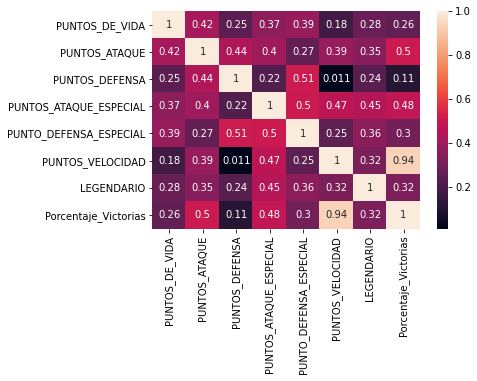

In [35]:
corr = pokedexUltimate.loc[:,['TIPO_1','PUNTOS_DE_VIDA','PUNTOS_ATAQUE',
'PUNTOS_DEFENSA','PUNTOS_ATAQUE_ESPECIAL','PUNTO_DEFENSA_ESPECIAL',
'PUNTOS_VELOCIDAD','LEGENDARIO','Porcentaje_Victorias']].corr()
sn.heatmap(corr,
 xticklabels=corr.columns,
 yticklabels=corr.columns, annot=True)


> Encontramos una relación fuerte entre el Porcentaje de victorias y los puntos de velocidad



In [0]:
#Guardado del Dataframe Pokedex
dataset = pokedexUltimate
dataset.to_csv("drive/My Drive/Colab Notebooks/Datasets/dataset.csv",index=False)

In [37]:
dataset = pd.read_csv("drive/My Drive/Colab Notebooks/Datasets/dataset.csv")
dataset.head()

,NUMERO,NOMBRE,TIPO_1,TIPO_2,PUNTOS_DE_VIDA,PUNTOS_ATAQUE,PUNTOS_DEFENSA,PUNTOS_ATAQUE_ESPECIAL,PUNTO_DEFENSA_ESPECIAL,PUNTOS_VELOCIDAD,NOMBRE_GENERATIONS,LEGENDARIO,Cantidad_Combates,Combates_Ganados,Porcentaje_Victorias
0,1,Bulbasaur,Planta,Veneno,45,49,49,65,65,45,1,0,133,37.0,27.819549
1,2,Ivysaur,Planta,Veneno,60,62,63,80,80,60,1,0,121,46.0,38.016529
2,3,Venusaur,Planta,Veneno,80,82,83,100,100,80,1,0,132,89.0,67.424242
3,4,Mega Venusaur,Planta,Veneno,80,100,123,122,120,80,1,0,125,70.0,56.000000
4,5,Charmander,Fuego,0,39,52,43,60,50,65,1,0,112,55.0,49.107143


In [38]:
dataset.shape

(784, 15)

##Extraemos las carácteristicas que seran fuente de aprendizaje (datos X) y datos de validación ( datos Y)

In [39]:
x = dataset.iloc[:,4:10].values
x

array([[ 45,  49,  49,  65,  65,  45],
       [ 60,  62,  63,  80,  80,  60],
       [ 80,  82,  83, 100, 100,  80],
       ...,
       [ 80, 110,  60, 150, 130,  70],
       [ 80, 160,  60, 170, 130,  80],
       [ 80, 110, 120, 130,  90,  70]])

In [40]:
y = dataset.iloc[:,14].values
y

array([27.81954887, 38.01652893, 67.42424242, 56.        , 49.10714286,
       54.23728814, 86.46616541, 85.61151079, 84.44444444, 16.23931624,
       41.84397163, 57.63888889, 14.7826087 ,  9.77443609, 62.5       ,
       23.42342342, 13.07692308, 62.5       , 96.63865546, 37.3015873 ,
       52.89256198, 86.15384615, 94.44444444, 48.14814815, 72.14285714,
       44.92753623, 83.7398374 , 36.64122137, 57.6       , 68.38235294,
       86.7768595 , 53.33333333, 16.80672269, 38.51351351, 54.09836066,
       25.        , 39.84375   , 56.42857143, 15.7480315 , 39.83739837,
       41.08527132, 81.1023622 , 11.53846154, 37.93103448, 75.78125   ,
        6.29370629, 21.70542636, 35.48387097,  9.42028986, 19.48051948,
       22.37762238, 65.71428571, 53.96825397, 84.375     , 65.        ,
       85.83333333, 33.09859155, 68.69565217, 46.61016949, 78.7037037 ,
       45.        , 79.8245614 , 72.        , 52.30769231, 32.40740741,
       66.92307692, 77.14285714, 78.18181818, 14.        , 25.80

Partimos la data en 80% para entrenamiento y 20% para hacer las pruebas

In [0]:
from sklearn.model_selection import train_test_split
X_APRENDIZAJE, X_VALIDACION, Y_APRENDIZAJE, Y_VALIDACION = train_test_split(x, y, test_size = 0.2, random_state = 0)


### Usaremos **Random Forest**

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
algoritmo = RandomForestRegressor()

algoritmo.fit(X_APRENDIZAJE, Y_APRENDIZAJE)

predicciones = algoritmo.predict(X_VALIDACION)

precision = r2_score(Y_VALIDACION, predicciones)


print(">> ----------- BOSQUES ALEATORIOS -----------")
print(">> Precision = "+str(precision))
print("------------------------------------------")


>> ----------- BOSQUES ALEATORIOS -----------
>> Precision = 0.9286684161854251
------------------------------------------


#Guardado del modelo de aprendizaje

In [43]:
from sklearn.externals import joblib
archivo = 'drive/My Drive/Colab Notebooks/Modelos/modelo_pokemon.mod'
joblib.dump(algoritmo, archivo)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['drive/My Drive/Colab Notebooks/Modelos/modelo_pokemon.mod']